In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from scipy.stats import chi2_contingency,chi2

from scipy import stats
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats import weightstats as stests
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer


In [3]:
# 1. Read the dataset and view the first 10 rows of it.
# 2. Check the shape/dimension of the dataset
# 3. Check for the missing values.Display number of missing values per column.
# 4. Investigate and predict the missing BMI Value.
# 5. Check the datatype, number of non null values and name of each variable in the dataset.
# 6. Check the descriptive statistics of the dataset.
# 7. Visualize the proportion of Stroke samples in the dataset.
# 8. Visualize the Distribution of Male and Female Ages. Write the Observation
# 10.Visualize the stroke sample based on
# a) BMI and Glucose Level
# b) BMI and Age
# 11. Using the pie chart visualizes the proportion of different smoking categories among the
# stroke population.
# 12. Perform hypothesis testing to find the significant variables.
# 13. Drop the unnecessary columns.
# 14. Write the code to replace following categories columns in integer format as follow –
# a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
#  b) ever_married('Yes': 1, 'No': 0)
#  c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)
# 15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.
# 16. List down columns that are highly skewed.
# 17. List down the columns that are highly kurtosis.
# 18. Find the distribution of all variables with respect to the outcome 'stroke' variable.
# 19. Plot the heatmap for correlation matrix for the given dataset. Write the observation.
# Especially note down columns that are highly correlated (Positive or negative correlation,
# consider 0.7 to 1 as high)
# 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.
# 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach
# to balanced the dataset by using the correct technique.
# 22. Model Selection/hyperparameter tuning
# - Try different models and fine tune their performance until you get the desired level of 
# performance on the given dataset. 
#  Model Evaluation 
# - Evaluate the models using appropriate evaluation metrics

In [4]:
#Q1. Read the dataset and view the first 10 rows of it?

df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
df=df.drop('id',axis=1)

In [6]:
df['stroke'].unique()

array([1, 0], dtype=int64)

In [7]:
#Q2. Check the shape/dimension of the dataset?
df.shape

(5110, 11)

In [8]:
#Q 3. Check for the missing values.Display number of missing values per column?
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df['bmi'].mean()

28.893236911794673

In [10]:
df['bmi'].median()

28.1

In [11]:
#Q4. Investigate and predict the missing BMI Value?
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [12]:
#Q5. Check the datatype, number of non null values and name of each variable in the dataset?
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [13]:
#Q6. Check the descriptive statistics of the dataset?
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [14]:
#Q7 Visualize the proportion of Stroke samples in the dataset?
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
len(df[df['smoking_status']=='smokes'])/len(df)

0.1544031311154599

In [16]:
#Q 8. Visualize the Distribution of Male and Female Ages. Write the Observation?
x=df[df['gender']=='Male']['age']
x1=df[df['gender']=='Female']['age']

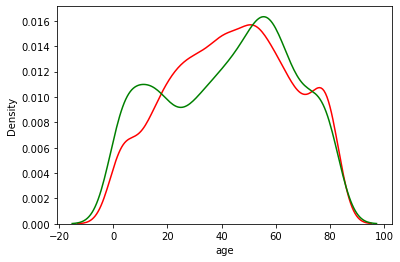

In [17]:
sns.kdeplot(x1,color='r')
sns.kdeplot(x,color='g')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

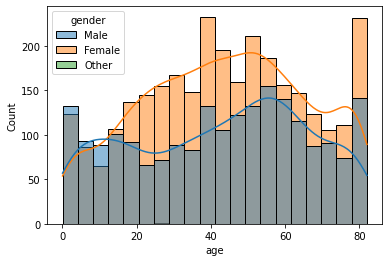

In [18]:
sns.histplot(data=df,x='age',hue='gender',kde=True)

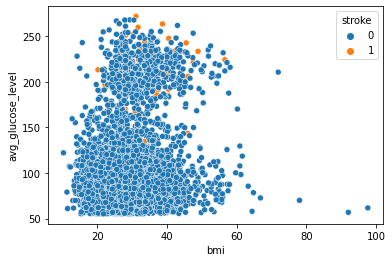

In [19]:
# 10.Visualize the stroke sample based on
# a) BMI and Glucose Level
# b) BMI and Age

sns.scatterplot(x='bmi',y='avg_glucose_level',data=df,hue='stroke')
plt.show()

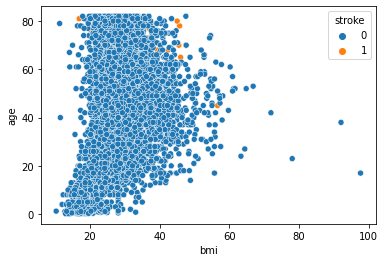

In [20]:
sns.scatterplot(x='bmi',y='age',data=df,hue='stroke')
plt.show()

In [21]:
#Q 11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population?

<AxesSubplot:ylabel='smoking_status'>

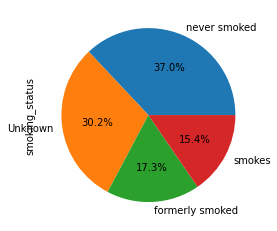

In [22]:
df['smoking_status'].value_counts().plot(kind='pie',autopct='%.1f%%')

In [23]:
#Q 12. Perform hypothesis testing to find the significant variables?


In [26]:
# Categorical columns:
cat_cols = df.select_dtypes(object).columns
cat_cols
# When both the columns that need to be tested are categorical, we will do a chi_square contingency test

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [39]:
p_vals = {}
for i in cat_cols:
    table = pd.crosstab(df[i], df['stroke'])
    observed_value = table.values
    chi2, p, dof, expected = chi2_contingency(observed_value,correction=False)
    p_vals[i] = p

In [40]:
p_vals
# p-value is greater than 0.05 for gender and residence_type, hence, these columns are insignificant (as we fail to reject null hypothesis) 
# Others are significant (as we reject the null hypothesis)

{'gender': 0.7895490538408245,
 'ever_married': 9.58932501427625e-15,
 'work_type': 5.397707801896119e-10,
 'Residence_type': 0.26915903227493193,
 'smoking_status': 2.0853997025008455e-06}

In [42]:
# Numnerical columns:

num_cols = df.drop(columns = 'stroke').select_dtypes(np.number).columns
num_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

In [44]:
df['stroke'].value_counts()
# We'll carry out ztest as the sample size for both categories are large

0    4861
1     249
Name: stroke, dtype: int64

In [49]:
p_val = {}
for i in num_cols:
    x1 = df[(df['stroke'] == 0)][i]
    x2 = df[(df['stroke'] == 1)][i]
    z_score, pval = stests.ztest(x1 = x1, x2 = x2 , value = 0, alternative = 'two-sided')
    p_val[i] = pval

In [50]:
p_val

# p-value is greater than 0.05 for bmi, hence, this column is insignificant (as we fail to reject null hypothesis) 
# Others are significant (as we reject the null hypothesis)

{'age': 4.512034549927382e-73,
 'hypertension': 3.0545852740333194e-20,
 'heart_disease': 2.2171764460236954e-22,
 'avg_glucose_level': 1.8461548402658107e-21,
 'bmi': 0.009809498659843801}

In [ ]:
# 13. Drop the unnecessary columns.


In [51]:
df = df.drop(columns = ['gender','Residence_type','bmi'])
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,67.0,0,1,Yes,Private,228.69,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,202.21,never smoked,1
2,80.0,0,1,Yes,Private,105.92,never smoked,1
3,49.0,0,0,Yes,Private,171.23,smokes,1
4,79.0,1,0,Yes,Self-employed,174.12,never smoked,1


In [ ]:
#Q14. Write the code to replace following categories columns in integer format as follow –
# a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':-1,'Never_worked':-2)
#  b) ever_married('Yes': 1, 'No': 0)
#  c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)


In [52]:
#A
df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':1,'Never_worked':-2},inplace=True)

In [53]:
#B
df['ever_married'].replace({'Yes':1,'No':0},inplace=True)

In [54]:
#C
df['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1},inplace=True)

In [56]:
#Q 15. Check the distribution of 'bmi' and 'stroke' columns in the dataset?


In [ ]:
# sns.histplot(data=df,x=df['bmi'],hue='stroke',kde=True)
# due to insignificient behaviour we droped bmi from the data so we cant perform distribution in this queston.

In [59]:
#Q 16. List down columns that are highly skewed?

check=df.drop('stroke',axis=1).columns

In [60]:
check=list(check)

In [61]:
check

['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'avg_glucose_level',
 'smoking_status']

In [62]:
df[check].skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type            0.679586
avg_glucose_level    1.572284
smoking_status       0.082279
dtype: float64

#['hypertension','heart_disease','avg_glucose_level','bmi'] are highely skewed features.

In [63]:
#Q 17. List down the columns that are highly kurtosis?

df[check].kurt()

age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type            -0.085432
avg_glucose_level     1.680479
smoking_status       -0.922415
dtype: float64

#['hypertension','heart_disease','avg_glucose_level','bmi'] have high kurtosis.

In [64]:
#Q 18. Find the distribution of all variables with respect to the outcome 'stroke' variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   int64  
 4   work_type          5110 non-null   int64  
 5   avg_glucose_level  5110 non-null   float64
 6   smoking_status     5110 non-null   int64  
 7   stroke             5110 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 319.5 KB


In [65]:
x=df.drop('stroke',axis=1).columns

In [66]:
len(x)

7

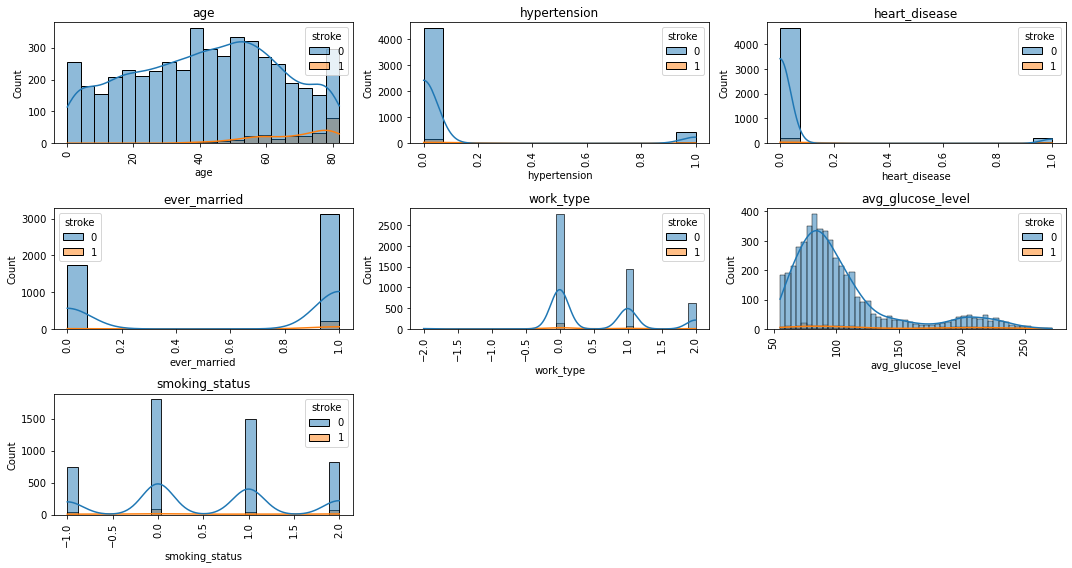

In [68]:
plt.rcParams['figure.figsize']=[15,8]
col=3
row=3
itr=1
for k in x:
    plt.subplot(col,row,itr)
    sns.histplot(data=df,x=df[k],hue=df['stroke'],kde=True)
    plt.title(k)
    itr+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<AxesSubplot:>

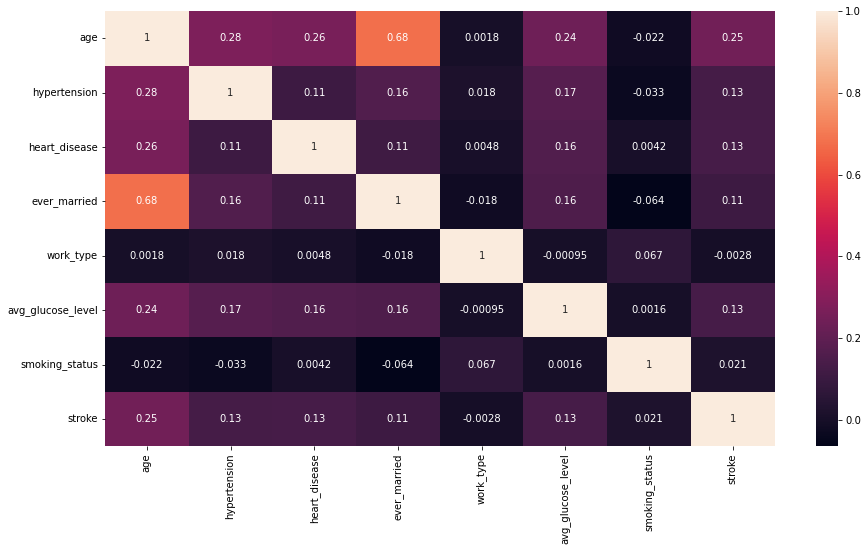

In [69]:
#Q 19 Plot the heatmap for correlation matrix for the given dataset. Write the observation.
# Especially note down columns that are highly correlated (Positive or negative correlation,
# consider 0.7 to 1 as high)?

sns.heatmap(df.corr(),annot=True)

In [ ]:
# we found age is high correlated with ever_married.
# work_type is negative correlated with ever_married.
# smoking_status is negative correlated with ever_married,hypertension,age.

In [71]:
#Q 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio?

x=df.drop('stroke',axis=1)
y=df['stroke']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=10)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(3577, 7)
(1533, 7)
(3577,)
(1533,)


In [ ]:
# 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach
# to balanced the dataset by using the correct technique.


In [72]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [79]:
x,y = SMOTE().fit_resample(x,y)

In [ ]:
# 22. Model Selection/hyperparameter tuning
# - Try different models and fine tune their performance until you get the desired level of 
# performance on the given dataset. 
#  Model Evaluation 
# - Evaluate the models using appropriate evaluation metrics

In [98]:
#A
dt=DecisionTreeClassifier(random_state=10)
model=dt.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1453
           1       0.16      0.16      0.16        80

    accuracy                           0.91      1533
   macro avg       0.56      0.56      0.56      1533
weighted avg       0.91      0.91      0.91      1533

[[1384   69]
 [  67   13]]


In [93]:
params=[{'criterion':['gini','entropy'],
        'min_samples_split':[2,3,4],
        'min_samples_leaf':[1,2,3],
        }]
grd=GridSearchCV(estimator=dt,param_grid=params,cv=5)
model=grd.fit(xtrain,ytrain)
grd.best_params_

{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2}

In [94]:
dt=DecisionTreeClassifier(criterion='gini',min_samples_leaf=2,min_samples_split=2,random_state=10)
model=dt.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1453
           1       0.21      0.14      0.17        80

    accuracy                           0.93      1533
   macro avg       0.58      0.55      0.56      1533
weighted avg       0.91      0.93      0.92      1533



After applying hyper parameter tuning our accuracy and f1-score of decision tree model has incresed.

In [100]:
#A
rf=RandomForestClassifier(random_state=10)
model=rf.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.22      0.03      0.04        80

    accuracy                           0.94      1533
   macro avg       0.59      0.51      0.51      1533
weighted avg       0.91      0.94      0.92      1533

[[1446    7]
 [  78    2]]


In [102]:
params=[{'n_estimators':[100,120,130],
    'criterion':['gini','entropy'],
        'min_samples_split':[2,3,4],
        'min_samples_leaf':[1,2,3],
        }]
grd=GridSearchCV(estimator=rf,param_grid=params,cv=5)
model=grd.fit(xtrain,ytrain)
grd.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [104]:
import warnings
warnings.filterwarnings('ignore')
rf=RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=2,min_samples_leaf=3,random_state=10)
model=rf.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533

[[1453    0]
 [  80    0]]


After applying hyper parameter tuning our accuracy  of Random Forest model has incresed. 